In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [2]:
import nltk
import subprocess
import os

# Specify the full path to 'wordnet.zip' and the target directory
wordnet_zip_path = '/kaggle/working/wordnet.zip'
target_directory = '/kaggle/working/corpora/'

try:
    nltk.data.find('corpora/wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    # Create the target directory if it doesn't exist
    os.makedirs(target_directory, exist_ok=True)
    command = f"unzip {wordnet_zip_path} -d {target_directory}"
    subprocess.run(command, shell=True)
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet


[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Filepaths
description_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt"
test_data_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt"
test_data_sol_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt"
train_data_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt"

In [4]:
# Function to read txt file
def read_txt_file(filepath):
    with open(filepath, 'r') as file:
        content = file.read()
    return content

In [5]:
import os

description_path = 'description.txt'

if os.path.exists(description_path):
    # The file exists, so you can proceed to read it.
    with open(description_path, 'r') as file:
        content = file.read()
    print(content)
else:
    print(f"The file '{description_path}' does not exist.")


Train data:
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION
ID ::: TITLE ::: GENRE ::: DESCRIPTION

Test data:
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION
ID ::: TITLE ::: DESCRIPTION

Source:
ftp://ftp.fu-berlin.de/pub/misc/movies/database/


In [6]:
# Define the file path to your CSV file
train_data = 'train_data.txt'  # Replace with the actual file path

# Now you can proceed with reading the CSV file and creating the DataFrame
train_df = pd.read_csv(train_data, sep=':::', header=None, engine='python')

# Give columns comprehensive names
train_df.columns = ['Id', 'Title', 'Genre', 'Description']

# Print DataFrame information
print(train_df.info())
print(type(train_df))
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
test_data_path='train_data.txt'
test_df = pd.read_csv(test_data_path, sep=':::', header=None, engine='python')

# Give columns comprehensive names
test_df.columns = ['Id','Title','Genre','Description']

print(test_df.info())
print(type(test_df))
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
<class 'pandas.core.frame.DataFrame'>


,Id,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [9]:
# missing values
train_df.isnull().sum()

Id             0
Title          0
Genre          0
Description    0
dtype: int64

In [10]:
# check for duplicate values
train_df.duplicated().sum()

0

In [11]:
# output classes
output_categories = train_df.Genre.unique()
print(len(output_categories))
output_categories


27


array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [12]:
# Getting all the classes (Genres)
genres = train_df.Genre
print(genres)

0               drama 
1            thriller 
2               adult 
3               drama 
4               drama 
             ...      
54209          comedy 
54210          horror 
54211     documentary 
54212          comedy 
54213         history 
Name: Genre, Length: 54214, dtype: object


In [13]:
# Label encoding the output categories
le = LabelEncoder()
le.fit(genres)
le.classes_

array([' action ', ' adult ', ' adventure ', ' animation ', ' biography ',
       ' comedy ', ' crime ', ' documentary ', ' drama ', ' family ',
       ' fantasy ', ' game-show ', ' history ', ' horror ', ' music ',
       ' musical ', ' mystery ', ' news ', ' reality-tv ', ' romance ',
       ' sci-fi ', ' short ', ' sport ', ' talk-show ', ' thriller ',
       ' war ', ' western '], dtype=object)

In [14]:
genres = le.transform(genres)
genres

array([ 8, 24,  1, ...,  7,  5, 12])

In [15]:
train_df['Labeled Genre'] = genres

In [16]:
train_df.head()

,Id,Title,Genre,Description,Labeled Genre
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


In [17]:
cat = le.inverse_transform([2])
# cat = str(cat)
print(cat[0])
print(type(cat[0]))

 adventure 
<class 'str'>


In [18]:
# print(cat)

# Performing EDA

In [19]:
train_df.head()

,Id,Title,Genre,Description,Labeled Genre
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,8
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,24
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,8
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,8


In [20]:
train_df['Genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

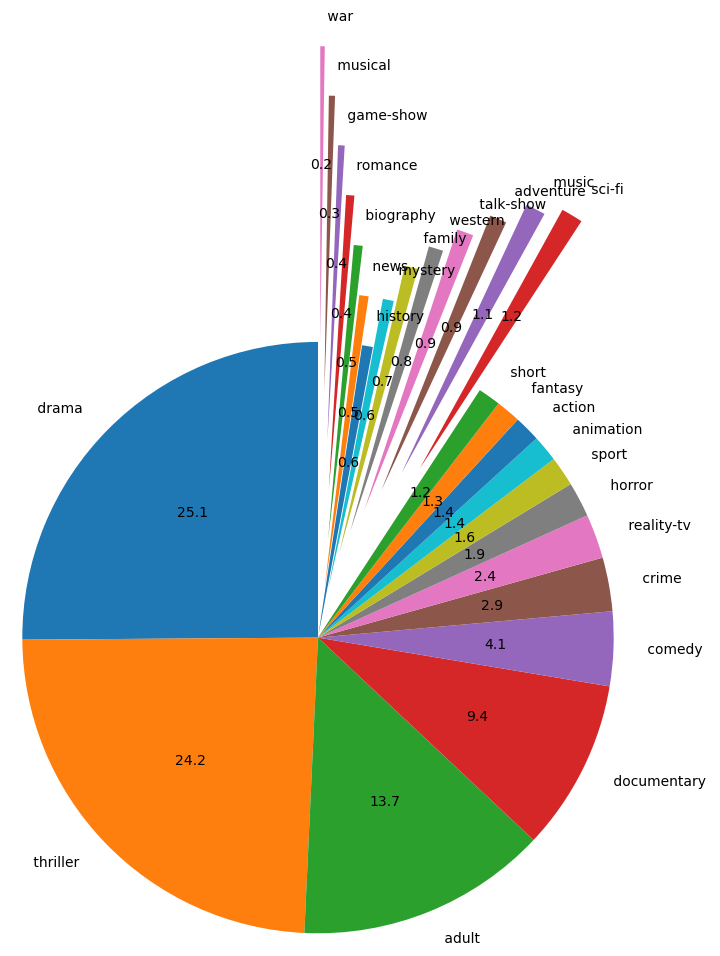

In [21]:
plt.figure(figsize=(8,8))
values = train_df['Genre'].value_counts()
plt.pie(values, labels=output_categories, autopct='%1.1f', startangle=90, radius=1.2, explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.8, 0.75, 0.65, 0.55, 0.45, 0.35, 0.2, 0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2))
plt.show()

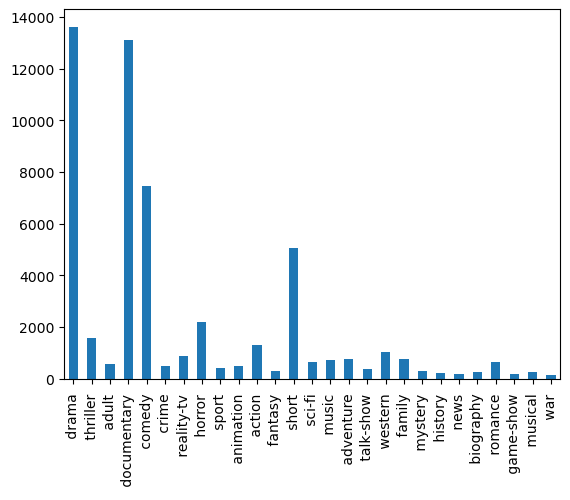

In [22]:
# Plotting the number of counts of each genre in the training set
train_df.Genre.value_counts()[train_df.Genre.unique()].plot(kind='bar')
plt.show()

In [23]:
# Converting the Description column (Series type) to numpy array
desc = train_df['Description']
for _ in range(2):
    print(desc[_])
    print("\n")
desc_arr = np.array(desc.tolist())
print(type(desc_arr))

 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.


 A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.


<class 'numpy.ndarray'>


In [24]:
wordnet = WordNetLemmatizer()

In [25]:
def preprocess_text(text):
    # removing special characters & numbers and just keeping alphabets
    var = re.sub("[^a-zA-Z]", " ", text)

    # lowercasing
    var = var.lower()

    var = var.split()
    var = [wordnet.lemmatize(word) for word in var if not word in set(stopwords.words('english'))] # removing stopwords
    var = ' '.join(var)

    return var

In [26]:
print(train_df['Description'][0])
t = preprocess_text(train_df['Description'][0])
print("\n>>> After processing:")
t

 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.

>>> After processing:


'listening conversation doctor parent year old oscar learns nobody courage tell week live furious refuse speak anyone except straight talking rose lady pink meet hospital stair christmas approach rose us fantastical experience professional wrestler imagination wit charm allow oscar live life love full company friend pop corn einstein bacon childhood sweetheart peggy blue'

In [27]:
import pandas as pd

# Load the training data from a CSV file (replace 'train_data.csv' with your actual file path)
train_data_path = 'train_data.txt'
train_df = pd.read_csv(train_data_path, sep=':::', header=None, engine='python')

# Give columns comprehensive names
train_df.columns = ['Id', 'Title', 'Genre', 'Description']

# Define the preprocess_text function
def preprocess_text(text):
    # Implement your text preprocessing logic here
    # For example, remove stopwords, punctuation, convert to lowercase, etc.
    # Return the preprocessed text
    processed_text = text  # Replace with your actual preprocessing logic
    return processed_text

# Apply the preprocess_text function to the 'Description' column and create a new column
train_df['Processed Description'] = train_df['Description'].apply(preprocess_text)

# Display the first few rows of the DataFrame
train_df.head()


,Id,Title,Genre,Description,Processed Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,The film's title refers not only to the un-re...


In [28]:
!pip install wordcloud


In [29]:
from wordcloud import WordCloud
wc = WordCloud(width=300, height=300, min_font_size=10, background_color='white')


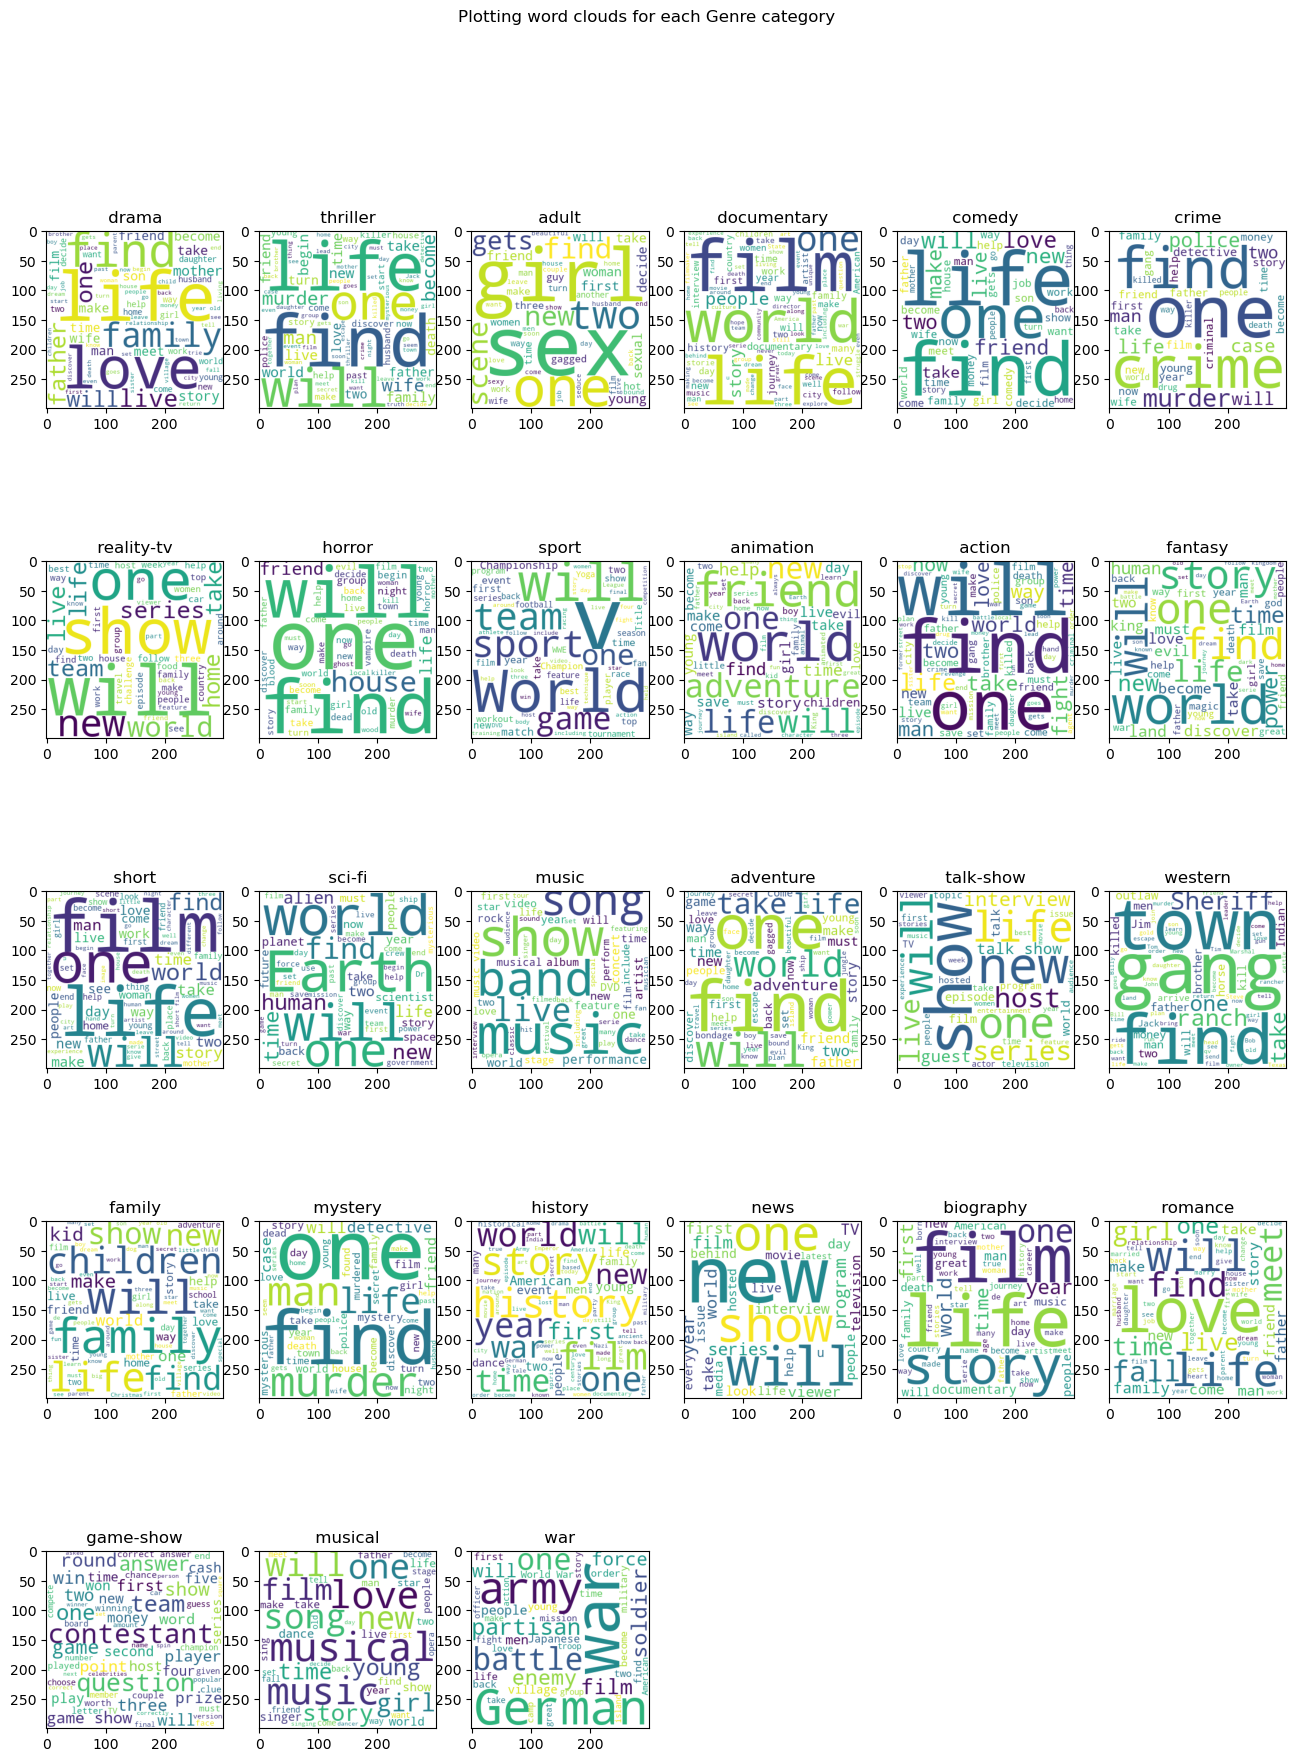

In [30]:
# Define the number of rows and columns for subplots
nrows = 5
ncols = 6

# Create subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Plotting word clouds for each Genre category')

# Loop through unique genres
unique_genres = train_df['Genre'].unique()
for i, genre in enumerate(unique_genres):
    ax = axs[i // ncols, i % ncols]
    # Generate word cloud for the current genre
    cloud = wc.generate(train_df[train_df['Genre'] == genre]['Processed Description'].str.cat(sep=" "))
    ax.imshow(cloud)
    ax.set_title(genre)

# Hide any remaining empty subplots
for i in range(len(unique_genres), nrows * ncols):
    axs.flatten()[i].axis('off')

# Show the plot
plt.show()


In [32]:
# Now building a corpus which will be a 2d list with 27 rows, one row for each genre's description corpus
corpus = []

# Loop through unique genres
for genre in train_df['Genre'].unique():
    corpus_i = []
    for desc in train_df[train_df['Genre'] == genre]['Processed Description'].tolist():
        for word in desc.split():
            corpus_i.append(word)
    corpus.append(corpus_i)

# The length of the corpus should be 27
print(len(corpus))


27


In [33]:
from collections import Counter

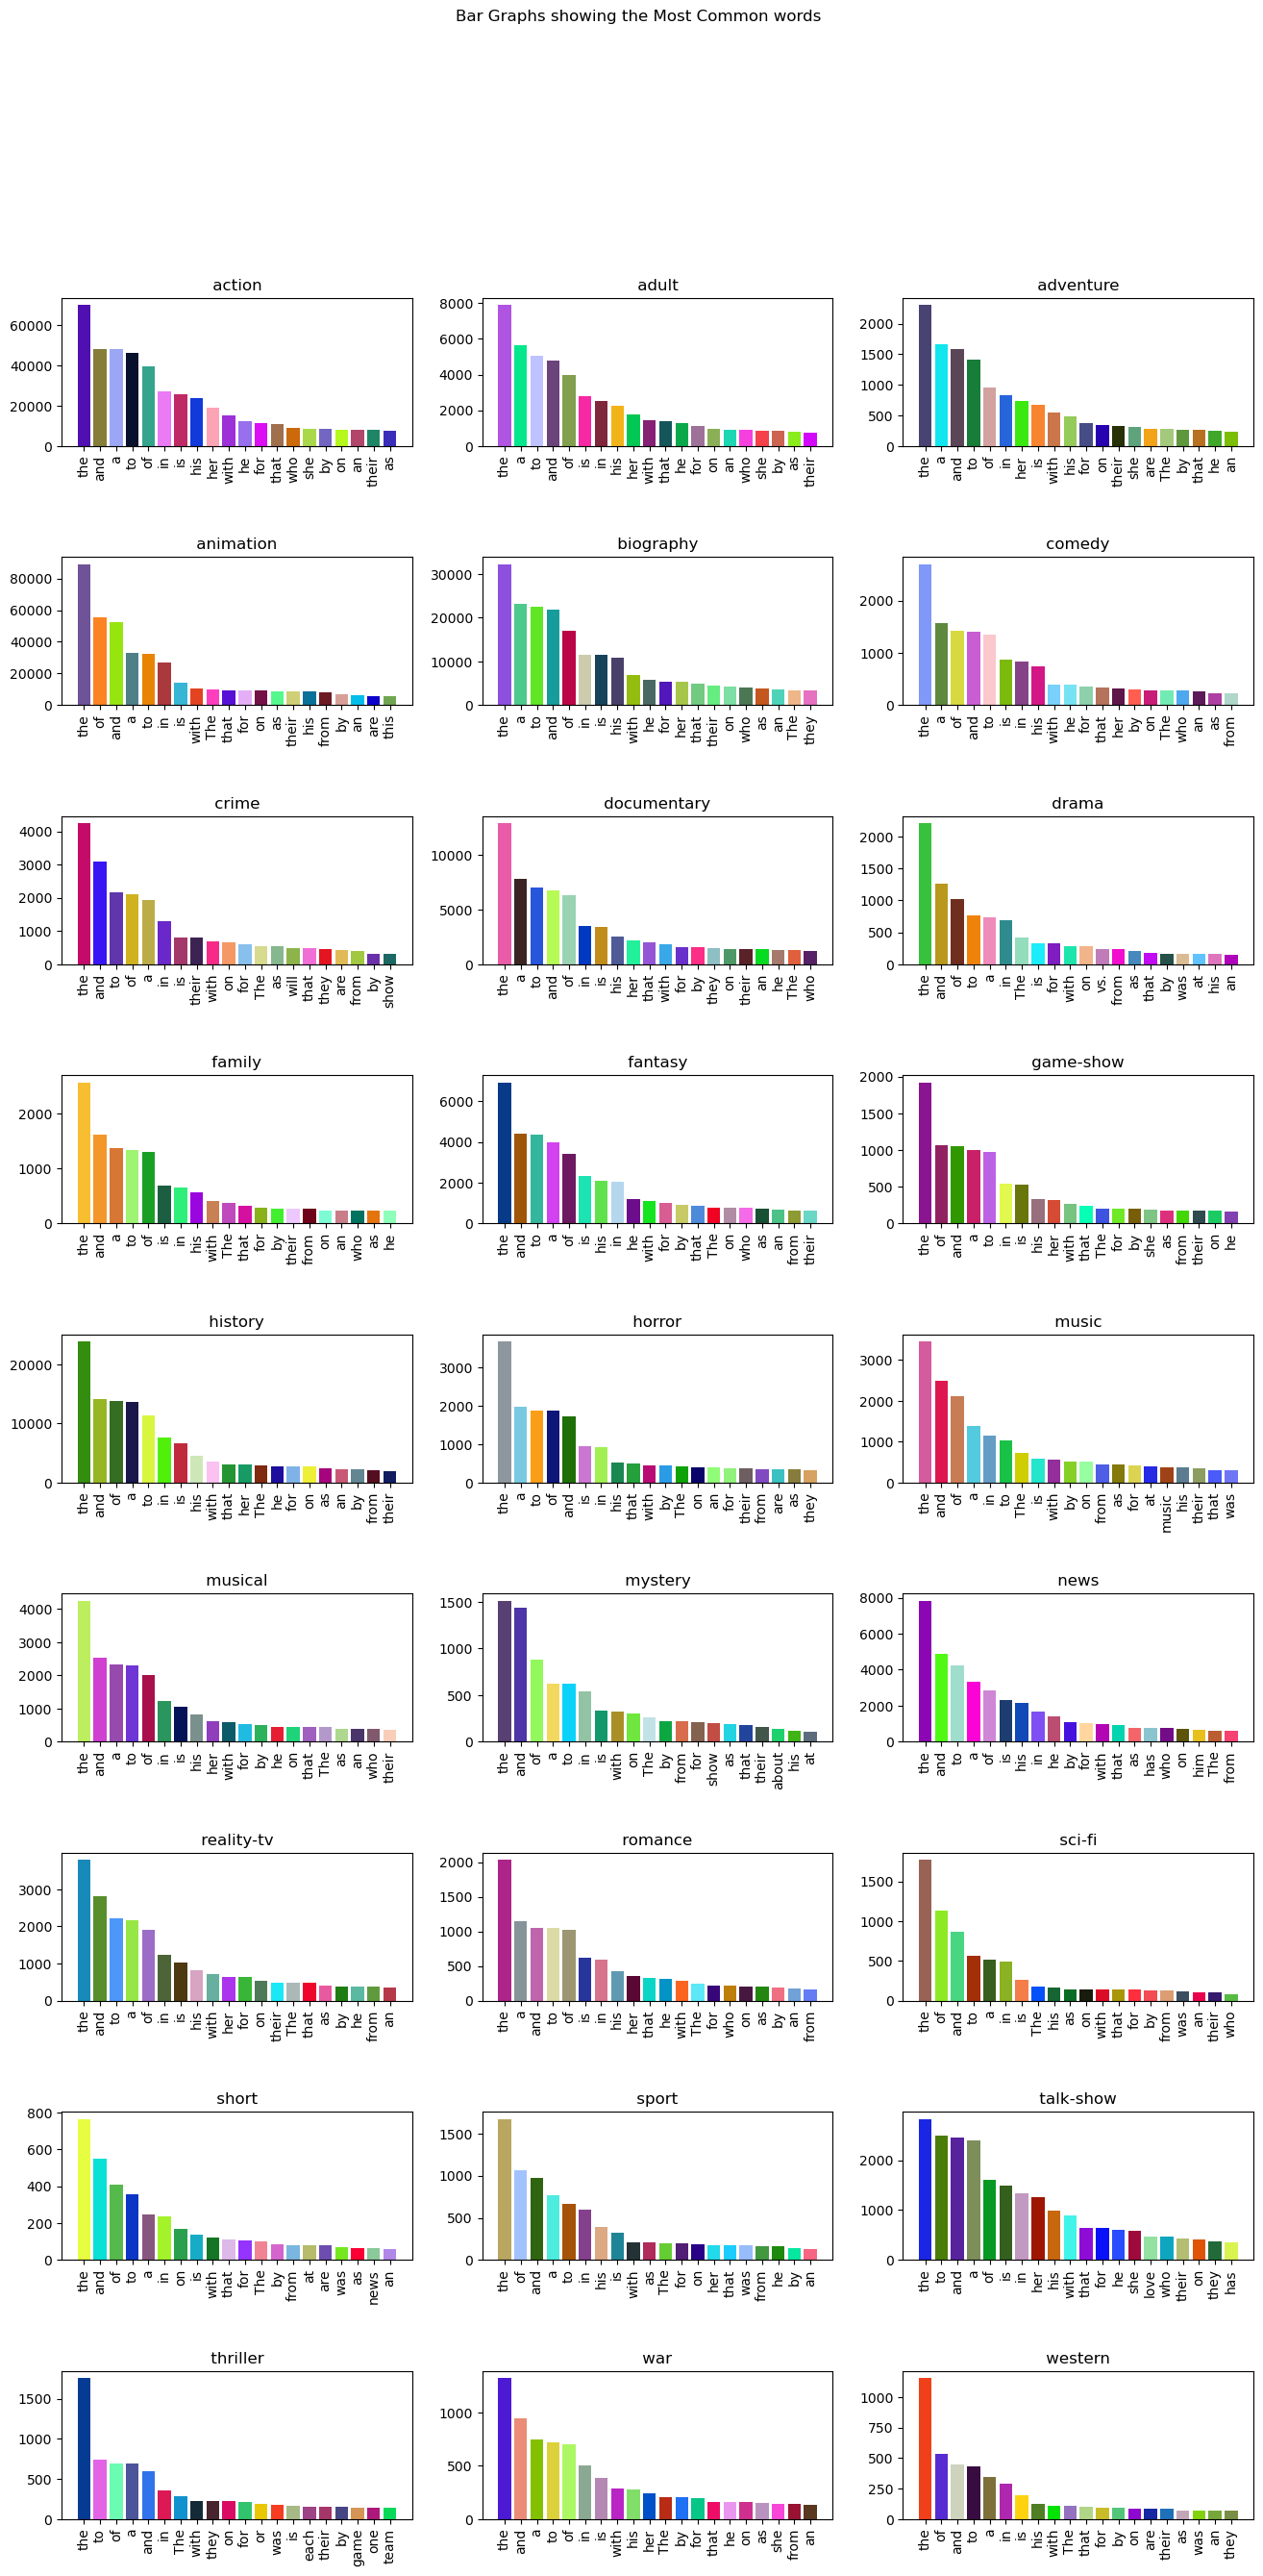

In [34]:
fig, axs = plt.subplots(nrows=9, ncols=3,figsize=(16,30))
plt.subplots_adjust(hspace=0.75)
fig.suptitle('Bar Graphs showing the Most Common words')

for i, l in enumerate(corpus):
    colors = np.random.rand(20, 3)
    ax = axs[i//3,i%3]
    df = pd.DataFrame(Counter(l).most_common(20))
    ax.bar(df[0], df[1], color=colors)
    ax.set_title(le.inverse_transform([i])[0])

    # Setting tick positions and labels
    ax.set_xticks(np.arange(len(df[0])))
    ax.set_xticklabels(df[0].tolist(),rotation=90)

plt.xticks(rotation='vertical')
plt.show()


# Building the Model

In [35]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [36]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [37]:
wv = api.load('word2vec-google-news-300')

[=================================================-] 99.8% 1659.1/1662.8MB downloaded


In [40]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [41]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)

    i = 0
    for w in sent.split():
        if w in wv:
            i += 1
            wv_res += wv[w]
    wv_res = wv_res/i
    return wv_res

In [42]:
train_df['Vectorized'] = train_df['Processed Description'].apply(sent_vec)

In [44]:
train_df.head()

,Id,Title,Genre,Description,Processed Description,Vectorized
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,Listening in to a conversation between his do...,"[0.048274681216380635, 0.02261415075083248, 0...."
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,A brother and sister with a past incestuous r...,"[-0.040308837890625, 0.06810302734375, 0.01909..."
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,As the bus empties the students for their fie...,"[0.04648548168140453, 0.01602556417276571, 0.0..."
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,To help their unemployed father make ends mee...,"[0.024915041623415648, 0.04225850272011924, 0...."
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,The film's title refers not only to the un-re...,"[0.052242923092532464, 0.029394372717126624, 0..."


In [47]:
X_train = train_df['Vectorized'].tolist()
y_train = train_df['Genre'].tolist()

In [48]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score, classification_report
from sklearn.linear_model import LogisticRegression

In [49]:
gnb = GaussianNB()
bnb = BernoulliNB()
lg = LogisticRegression(multi_class='ovr')

In [50]:
gnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
lg.fit(X_train, y_train)

C:\Users\aliaz\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [51]:
train_df.columns

Index(['Id', 'Title', 'Genre', 'Description', 'Processed Description',
       'Vectorized'],
      dtype='object')

In [67]:
test_sol_df['Processed Description'] = test_sol_df['Description'].apply(preprocess_text)

In [68]:
test_sol_df['Vectorized'] = test_sol_df['Processed Description'].apply(sent_vec)

In [69]:
test_genres = test_sol_df['Genre']
test_sol_df['Labeled Genre'] = le.transform(test_genres)
test_sol_df.head()

,Id,Title,Genre,Description,Processed Description,Vectorized,Labeled Genre
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar...","L.R. Brane loves his life - his car, his apar...","[0.07773399353027344, 0.046141624450683594, 0....",24
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch...","Spain, March 1964: Quico is a very naughty ch...","[0.07304400708301957, 0.04547459246164345, 0.0...",5
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...,One year in the life of Albin and his family ...,"[0.03034325801964962, 0.08271928267045454, 0.0...",7
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi...","His father has died, he hasn't spoken with hi...","[0.0388958810389727, 0.06314088010239875, 0.01...",8
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...,Before he was known internationally as a mart...,"[0.042134123028449294, 0.05756154150333045, 0....",8


In [70]:
X_test = test_sol_df['Vectorized'].tolist()
y_test = test_sol_df['Labeled Genre'].tolist()

In [71]:
print(len(X_test))
print(len(y_test))

54200
54200
